In [49]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import RobustScaler


In [2]:
files = [file for file in os.listdir('./parametros')]

param = pd.DataFrame()
for file in files:
  df = pd.read_csv('./parametros/'+file)
  param = pd.concat([param, df], axis= 0)

Como los intentos pasados de la red no han salido como hemos querido, lo que se buscará aqui es tomar únicamente los valores máximos de cada 600 datos, que es una gráfica de las que obtuvimos previamente

Dividir el dataframe en 64 sub dataframes de igual longitud (600)

In [3]:
#Contiene todos los subdataframes
sub_dfs = np.array_split(param, 64)

Crear DataFrame vacío que contendrá los valores máximos

In [4]:
df_max = pd.DataFrame(columns=['Índice de absorción MAX', 'Longitud de onda MAX', 'Fracción Volumen', 'Espesor de la película (nm)', 'Radio (nm)'])

In [5]:
for i, sub_df in enumerate(sub_dfs):
    # Encontrar el valor máximo de índice de refracción y su longitud de onda correspondiente
    fila_max = sub_df.loc[sub_df['Índice de absorción'].idxmax()]
    # Imprimir el valor máximo y su correspondiente en la columna 1
    df_max = df_max.append({'Índice de absorción MAX': fila_max['Índice de absorción'], 
                            'Longitud de onda MAX': fila_max['Longitud de onda'],
                            'Fracción Volumen': fila_max['Fracvol'],
                            'Espesor de la película (nm)': fila_max['Espesor de la película (nm)'],
                            'Radio (nm)': fila_max['Radio (nm)']}, ignore_index=True)


C:\Users\PcR\AppData\Local\Temp\ipykernel_15168\2759968200.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append({'Índice de absorción MAX': fila_max['Índice de absorción'],
C:\Users\PcR\AppData\Local\Temp\ipykernel_15168\2759968200.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append({'Índice de absorción MAX': fila_max['Índice de absorción'],
C:\Users\PcR\AppData\Local\Temp\ipykernel_15168\2759968200.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_max = df_max.append({'Índice de absorción MAX': fila_max['Índice de absorción'],
C:\Users\PcR\AppData\Local\Temp\ipykernel_15168\2759968200.py:5: FutureWarning: The frame.append method is deprecated and will be removed from panda

In [6]:
df_max

,Índice de absorción MAX,Longitud de onda MAX,Fracción Volumen,Espesor de la película (nm),Radio (nm)
0,0.016685,301.0,1.0,100.0,10.0
1,0.016949,301.0,1.0,105.0,10.0
2,0.017202,301.0,1.0,110.0,10.0
3,0.017405,301.0,1.0,115.0,10.0
4,0.017537,301.0,1.0,120.0,10.0
...,...,...,...,...,...
59,0.017540,301.0,1.0,120.0,5.0
60,0.017539,301.0,1.0,120.0,6.0
61,0.017539,301.0,1.0,120.0,7.0
62,0.017538,301.0,1.0,120.0,8.0


# Red que tiene de input longitud de onda y coeficiente de absorción y de output, fracción volumen, espesor de la película y radio

In [16]:
# Seleccionar las columnas de entrada y salida
salida = ['Fracción Volumen', 'Radio (nm)', 'Espesor de la película (nm)']
entrada = ['Longitud de onda MAX', 'Índice de absorción MAX']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_max[entrada], df_max[salida], test_size=0.2, random_state=42)

In [50]:
# Crear objetos StandardScaler para normalizar los datos de entrada y salida
scaler_X = RobustScaler()
scaler_y = RobustScaler()

# Ajustar los objetos scaler a los datos de entrenamiento
scaler_X.fit(X_train)
scaler_y.fit(y_train)

# Aplicar la normalización a los datos de entrenamiento y prueba
X_train_norm = scaler_X.transform(X_train)
X_test_norm = scaler_X.transform(X_test)
y_train_norm = scaler_y.transform(y_train)
y_test_norm = scaler_y.transform(y_test)

In [51]:
# Definir la estructura de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3)
])

# Compilar la red neuronal
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_absolute_error')

In [52]:
history = model.fit(X_train_norm, y_train_norm, epochs=100, batch_size=4, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 11ms/step - loss: 6.4250 - val_loss: 15.4930
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 5.5570 - val_loss: 11.6633
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 4.3507 - val_loss: 15.9849
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 6.0656 - val_loss: 8.5132
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 4.2118 - val_loss: 4.9942
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.1900 - val_loss: 4.9152
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 1.9540 - val_loss: 3.8670
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 1.5976 - val_loss: 2.8524
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 1.3902 - val_loss: 2.4175
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 1.5344 - val_loss: 2.7169
Epoch

In [53]:
# Evaluar el rendimiento de la red neuronal
y_pred_norm = model.predict(X_test_norm)
loss = model.evaluate(X_test_norm, y_test_norm)

# Desnormalizar los resultados finales
y_pred_denorm = scaler_y.inverse_transform(y_pred_norm)
y_test_denorm = scaler_y.inverse_transform(y_test_norm)

1/1 [==============================] - 0s 18ms/step - loss: 1.9706


In [54]:
pd.DataFrame(y_test_denorm)

,0,1,2
0,1.0,30.0,120.0
1,1.0,36.0,120.0
2,1.0,10.0,100.0
3,1.0,22.0,120.0
4,1.0,10.0,125.0
5,1.0,14.0,120.0
6,10.0,10.0,120.0
7,1.0,10.0,80.0
8,3.0,10.0,120.0
9,1.0,7.0,120.0


In [55]:
pd.DataFrame(y_pred_denorm)

,0,1,2
0,1.062994,29.265596,119.957962
1,1.065009,31.700697,119.961998
2,1.538611,24.120451,97.043213
3,1.053755,18.811722,119.967453
4,1.076729,31.631685,120.068108
5,1.051522,11.129803,119.929459
6,9.381666,8.263309,119.988510
7,1.665105,27.857943,91.231232
8,2.550591,9.593865,119.975571
9,1.051065,11.141669,119.945854


In [56]:
# Calcular el error medio absoluto (MAE)
mae = mean_absolute_error(y_test_denorm, y_pred_denorm)
print('MAE:', mae)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test_denorm, y_pred_denorm)
print('MSE:', mse)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test_denorm, y_pred_denorm)
print('R^2:', r2)

MAE: 3.877072181457128
MSE: 78.85633119029684
R^2: 0.5330409625641738


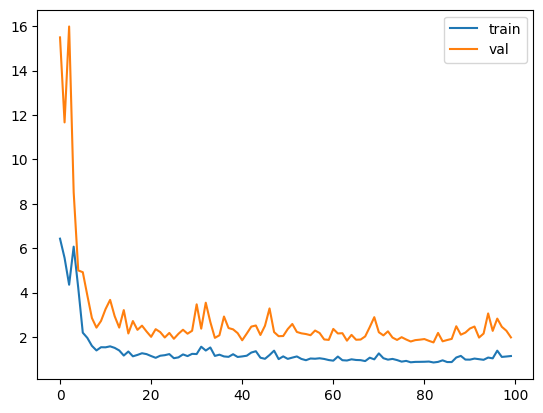

In [57]:
# Graficar la evolución del error a través de las épocas
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()